# **Initial Information**
---
The following dataset uses 488 URLs and obtains information pertaining to NVDA's stock, utilizing Google Search engine for our API Search. The following data's sentiments for every sentence has yet to be evaluated, and was pre-assigned sentiments based on Fin-BERT, a transformer-based sentiment classifier.


# **Forbes DataSet Cleanup**
---
The following is used to clean the forbes CSV file, and will be used as a blueprint for new data.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

df = pd.read_csv("nvda_sentence_sentiment_dataset.csv")
df.head()

,url,date,case_text,label,score,positive_prob,neutral_prob,negative_prob,numeric_label
0,https://finance.yahoo.com/quote/NVDL/,NaN,The fund will enter into one or more swap agreements with major financial institutions for a specified period ranging from a day to more than one year whereby the fund and the financial institution will agree to exchange the return (or differentials in rates of return) earned or realized on the Underlying Stock. It is non-diversified. Graniteshares Trading--Leveraged Equity 4.9B 2022-12-12 Trailing returns as of 2/19/2025.,neutral,0.948888,0.030859,0.948888,0.020254,0
1,https://finance.yahoo.com/quote/NVDL/,NaN,Category is Trading--Leveraged Equity. Sign in to access your portfolio,neutral,0.941386,0.042054,0.941386,0.016559,0
2,"https://finance.yahoo.com/quote/NVDA,TSLA,NIO/",NaN,Sign in to access your portfolio,neutral,0.933108,0.051200,0.933108,0.015691,0
3,https://ca.finance.yahoo.com/m/678d1a66-a7f5-3dfa-995e-a58f95121e8e/3-high-growth-chip-stocks-to.html,2022-01-29T12:05:00.000Z,"Here's why Nvidia (NASDAQ: NVDA), Advanced Micro Devices (NASDAQ: AMD), and Marvell Technology Group (NASDAQ: MRVL) are worth a look right now. Nvidia stock is down about 35% from its all-time high, which it hit right before news of the omicron variant started dominating headlines in mid-November.",negative,0.974327,0.007392,0.018281,0.974327,-1
4,https://ca.finance.yahoo.com/m/678d1a66-a7f5-3dfa-995e-a58f95121e8e/3-high-growth-chip-stocks-to.html,2022-01-29T12:05:00.000Z,"The thing is, Nvidia trades for such an outrageous premium for a reason.",neutral,0.653938,0.072324,0.653938,0.273738,0


Checking Unique URLS: (total successful scrapes out of 493)

In [60]:
unique_urls = df['url'].nunique()
print("Unique URLs:", unique_urls)

Unique URLs: 488


Damn.



## **Date Time Corrections**
---
I noticed discrepencies when loading in the correct data for dates. We will be exploring and correcting these.

In [61]:
print(df.dtypes)
df['date'] = df['date'].astype(str)
df.head()


url               object
date              object
case_text         object
label             object
score            float64
positive_prob    float64
neutral_prob     float64
negative_prob    float64
numeric_label      int64
dtype: object


,url,date,case_text,label,score,positive_prob,neutral_prob,negative_prob,numeric_label
0,https://finance.yahoo.com/quote/NVDL/,nan,The fund will enter into one or more swap agreements with major financial institutions for a specified period ranging from a day to more than one year whereby the fund and the financial institution will agree to exchange the return (or differentials in rates of return) earned or realized on the Underlying Stock. It is non-diversified. Graniteshares Trading--Leveraged Equity 4.9B 2022-12-12 Trailing returns as of 2/19/2025.,neutral,0.948888,0.030859,0.948888,0.020254,0
1,https://finance.yahoo.com/quote/NVDL/,nan,Category is Trading--Leveraged Equity. Sign in to access your portfolio,neutral,0.941386,0.042054,0.941386,0.016559,0
2,"https://finance.yahoo.com/quote/NVDA,TSLA,NIO/",nan,Sign in to access your portfolio,neutral,0.933108,0.051200,0.933108,0.015691,0
3,https://ca.finance.yahoo.com/m/678d1a66-a7f5-3dfa-995e-a58f95121e8e/3-high-growth-chip-stocks-to.html,2022-01-29T12:05:00.000Z,"Here's why Nvidia (NASDAQ: NVDA), Advanced Micro Devices (NASDAQ: AMD), and Marvell Technology Group (NASDAQ: MRVL) are worth a look right now. Nvidia stock is down about 35% from its all-time high, which it hit right before news of the omicron variant started dominating headlines in mid-November.",negative,0.974327,0.007392,0.018281,0.974327,-1
4,https://ca.finance.yahoo.com/m/678d1a66-a7f5-3dfa-995e-a58f95121e8e/3-high-growth-chip-stocks-to.html,2022-01-29T12:05:00.000Z,"The thing is, Nvidia trades for such an outrageous premium for a reason.",neutral,0.653938,0.072324,0.653938,0.273738,0


In [62]:
print(df.shape[0])

9735



Date Format: NA or Empty


,date
0,nan
1,nan
2,nan
212,nan
213,nan
...,...
9687,nan
9688,nan
9689,nan
9690,nan



Date Format: Unknown Format


,date
3,2022-01-29T12:05:00.000Z
4,2022-01-29T12:05:00.000Z
5,2022-01-29T12:05:00.000Z
6,2022-01-28T12:19:00.000Z
7,2022-01-28T12:19:00.000Z
...,...
9730,2025-02-19T23:14:00.000Z
9731,2025-02-19T23:14:00.000Z
9732,2025-02-19T23:14:00.000Z
9733,2025-02-19T23:14:00.000Z


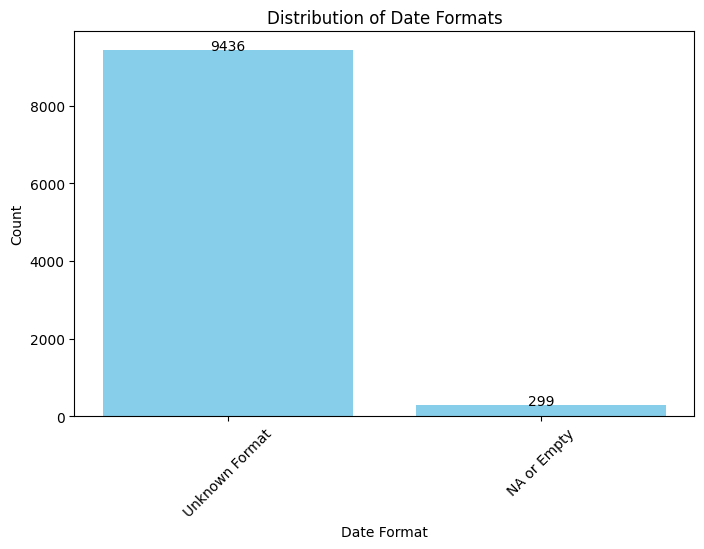

In [63]:
# Define regex patterns for different date formats
patterns = {
    'YYYY-MM-DD': r'^\d{4}-\d{2}-\d{2}$',  # ISO format
    'MMM D, YYYY': r'^[A-Za-z]{3} \d{1,2}, \d{4}$',  # Short month name
    'Month DD, YYYY': r'^[A-Za-z]+ \d{1,2}, \d{4}$',  # Full month name
    'YYYY': r'^\d{4}$',  # Year only
    'Datetime Format': r'^\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}$',  # Full timestamp
    'NA or Empty': r'^(nan|NaT|NA)$'
}

# Function to classify date formats
def classify_format(date):
    for fmt, pattern in patterns.items():
        if re.match(pattern, date):
            return fmt
    return "Unknown Format"  # If it doesn't match known formats

# Apply classification
df['date_format'] = df['date'].apply(classify_format)

# Group the original dataset by date format
grouped_dfs = {fmt: df[df['date_format'] == fmt] for fmt in df['date_format'].unique()}

# Display each grouped DataFrame separately
for fmt, group_df in grouped_dfs.items():
    print(f"\nDate Format: {fmt}")
    display(group_df[['date']])  # Display only the date column

# Count occurrences of each format
format_counts = df['date_format'].value_counts().reset_index()
format_counts.columns = ['Date Format', 'Count']

# Visualize the results
plt.figure(figsize=(8, 5))
plt.bar(format_counts['Date Format'], format_counts['Count'], color='skyblue')
plt.xlabel('Date Format')
plt.ylabel('Count')
plt.title('Distribution of Date Formats')
plt.xticks(rotation=45)  # Rotate labels for readability


# Add count labels on top of bars
for index, value in enumerate(format_counts['Count']):
    plt.text(index, value + 1, str(value), ha='center', fontsize=10)
    
plt.show()


We can see that most of these follow the YYYY-MM-DD Format. We will fix the other format, and go back and individually input all of the NAs.

In [64]:

parsed_dates = pd.to_datetime(df["date"], utc=True, errors="coerce")

valid_mask = parsed_dates.notna()

df.loc[valid_mask, "date"] = parsed_dates[valid_mask].dt.strftime("%Y-%m-%d")
df.loc[valid_mask, "date_format"] = "YYYY-MM-DD"

print("Unique date_format values after update:")
print(df["date_format"].unique())

print("\nHead of updated DataFrame:")
df.head()


Unique date_format values after update:
['NA or Empty' 'YYYY-MM-DD']

Head of updated DataFrame:


,url,date,case_text,label,score,positive_prob,neutral_prob,negative_prob,numeric_label,date_format
0,https://finance.yahoo.com/quote/NVDL/,nan,The fund will enter into one or more swap agreements with major financial institutions for a specified period ranging from a day to more than one year whereby the fund and the financial institution will agree to exchange the return (or differentials in rates of return) earned or realized on the Underlying Stock. It is non-diversified. Graniteshares Trading--Leveraged Equity 4.9B 2022-12-12 Trailing returns as of 2/19/2025.,neutral,0.948888,0.030859,0.948888,0.020254,0,NA or Empty
1,https://finance.yahoo.com/quote/NVDL/,nan,Category is Trading--Leveraged Equity. Sign in to access your portfolio,neutral,0.941386,0.042054,0.941386,0.016559,0,NA or Empty
2,"https://finance.yahoo.com/quote/NVDA,TSLA,NIO/",nan,Sign in to access your portfolio,neutral,0.933108,0.051200,0.933108,0.015691,0,NA or Empty
3,https://ca.finance.yahoo.com/m/678d1a66-a7f5-3dfa-995e-a58f95121e8e/3-high-growth-chip-stocks-to.html,2022-01-29,"Here's why Nvidia (NASDAQ: NVDA), Advanced Micro Devices (NASDAQ: AMD), and Marvell Technology Group (NASDAQ: MRVL) are worth a look right now. Nvidia stock is down about 35% from its all-time high, which it hit right before news of the omicron variant started dominating headlines in mid-November.",negative,0.974327,0.007392,0.018281,0.974327,-1,YYYY-MM-DD
4,https://ca.finance.yahoo.com/m/678d1a66-a7f5-3dfa-995e-a58f95121e8e/3-high-growth-chip-stocks-to.html,2022-01-29,"The thing is, Nvidia trades for such an outrageous premium for a reason.",neutral,0.653938,0.072324,0.653938,0.273738,0,YYYY-MM-DD


Taking care of NA dates, we have to look to see if the url has the date posted within it. We will view the following:

In [65]:
# Filter rows where the date_format is 'NA or Empty'
nan_dates_df = df[df['date_format'] == 'NA or Empty']

# Sort the filtered DataFrame by the 'url' column
nan_dates_df = nan_dates_df.sort_values(by='url')

unique_urls = nan_dates_df['url'].nunique()
print("Unique URLs:", unique_urls)


Unique URLs: 74


We have 74 URLs, which are all quotes. This means they are update every day. We will input the date we pulled them for these dates.

In [66]:
# Ensure Pandas doesn't truncate long strings
pd.set_option('display.max_colwidth', None)

# Extract unique URLs from the 'url' column and reset the index
unique_urls = nan_dates_df['url'].drop_duplicates().dropna().reset_index(drop=True)

# Print each URL with a numbered label
for i, url in enumerate(unique_urls, start=1):
    print(f"{i}. {url}")


1. https://ca.finance.yahoo.com/quote/NVDA.NE/community/
2. https://ca.finance.yahoo.com/quote/NVDS/
3. https://ca.finance.yahoo.com/research/reports/MS_0P000003RE_AnalystReport_1738008885000
4. https://finance.yahoo.com/calendar/splits?from=2022-07-30&to=2022-08-03&day=2022-08-03
5. https://finance.yahoo.com/quote/%5ENDXGEN5/
6. https://finance.yahoo.com/quote/...,FORUMS,GENTOO,NVDA,PRICES,QUOTE,STOCK,TOPIC,VIEW,XBMC/news/?ltr=1
7. https://finance.yahoo.com/quote/0P0001PBHN.F/performance/
8. https://finance.yahoo.com/quote/0P0001PGIC.F/
9. https://finance.yahoo.com/quote/1257.HK/
10. https://finance.yahoo.com/quote/1N8.F/
11. https://finance.yahoo.com/quote/688326.SS/
12. https://finance.yahoo.com/quote/8GM.F/
13. https://finance.yahoo.com/quote/AAPL,AMD,PLTR,BAC,NIO,NVDA,AAL,INTC,SNAP,TSLA,WFC,MSFT,X,XOM,FCX,VZ,CSCO,MU,CMCSA,MRK,TWTR,NLY,PYPL,MRNA,DAL,SPCE,QS,BMY,UAL,SLB,DIS,DVN,XPEV,HBAN,HPE,V,QCOM,ORCL,CHPT/
14. https://finance.yahoo.com/quote/AMD.BA/
15. https://finance.yahoo.com/

In [67]:
mask = (df["date"] == 'nan')
df.loc[mask, ["date", "date_format"]] = ["2025-02-19", "YYYY-MM-DD"]

df.head()

,url,date,case_text,label,score,positive_prob,neutral_prob,negative_prob,numeric_label,date_format
0,https://finance.yahoo.com/quote/NVDL/,2025-02-19,The fund will enter into one or more swap agreements with major financial institutions for a specified period ranging from a day to more than one year whereby the fund and the financial institution will agree to exchange the return (or differentials in rates of return) earned or realized on the Underlying Stock. It is non-diversified. Graniteshares Trading--Leveraged Equity 4.9B 2022-12-12 Trailing returns as of 2/19/2025.,neutral,0.948888,0.030859,0.948888,0.020254,0,YYYY-MM-DD
1,https://finance.yahoo.com/quote/NVDL/,2025-02-19,Category is Trading--Leveraged Equity. Sign in to access your portfolio,neutral,0.941386,0.042054,0.941386,0.016559,0,YYYY-MM-DD
2,"https://finance.yahoo.com/quote/NVDA,TSLA,NIO/",2025-02-19,Sign in to access your portfolio,neutral,0.933108,0.051200,0.933108,0.015691,0,YYYY-MM-DD
3,https://ca.finance.yahoo.com/m/678d1a66-a7f5-3dfa-995e-a58f95121e8e/3-high-growth-chip-stocks-to.html,2022-01-29,"Here's why Nvidia (NASDAQ: NVDA), Advanced Micro Devices (NASDAQ: AMD), and Marvell Technology Group (NASDAQ: MRVL) are worth a look right now. Nvidia stock is down about 35% from its all-time high, which it hit right before news of the omicron variant started dominating headlines in mid-November.",negative,0.974327,0.007392,0.018281,0.974327,-1,YYYY-MM-DD
4,https://ca.finance.yahoo.com/m/678d1a66-a7f5-3dfa-995e-a58f95121e8e/3-high-growth-chip-stocks-to.html,2022-01-29,"The thing is, Nvidia trades for such an outrageous premium for a reason.",neutral,0.653938,0.072324,0.653938,0.273738,0,YYYY-MM-DD


1 Final check to ensure all the dates are formatted correctly:

In [68]:
# 3. Apply classification to the 'date' column
df['date_format'] = df['date'].astype(str).apply(classify_format)

# 4. Count occurrences of each format
format_counts = df['date_format'].value_counts().reset_index()
format_counts.columns = ['Date Format', 'Count']

# 5. Display the results
print(format_counts)

  Date Format  Count
0  YYYY-MM-DD   9735


In [69]:
df.drop(columns=["date_format"], inplace=True)


## **Class Imbalances**
---
The following are to address class imbalances for the forbes pulled data:


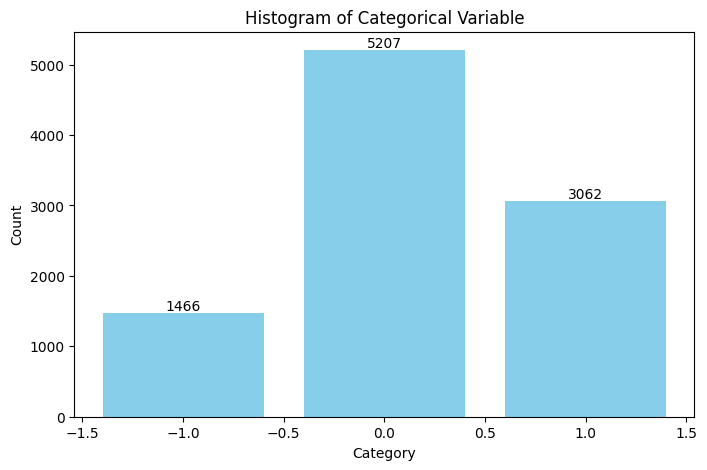

In [70]:
# Count occurrences of each category
category_counts = df['numeric_label'].value_counts()

# Plot histogram
plt.figure(figsize=(8,5))
bars = plt.bar(category_counts.index, category_counts.values, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Categorical Variable')

# Add numeric labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{int(height)}', 
             ha='center', va='bottom', fontsize=10)

plt.show()


### Hotfix: Undersampling

We will be saving 2 seperate files therefore: an under-sampled file that contains equal parts of sentiment for all data (for immediate training), and the full, cleaned dataset, which we will prune later.

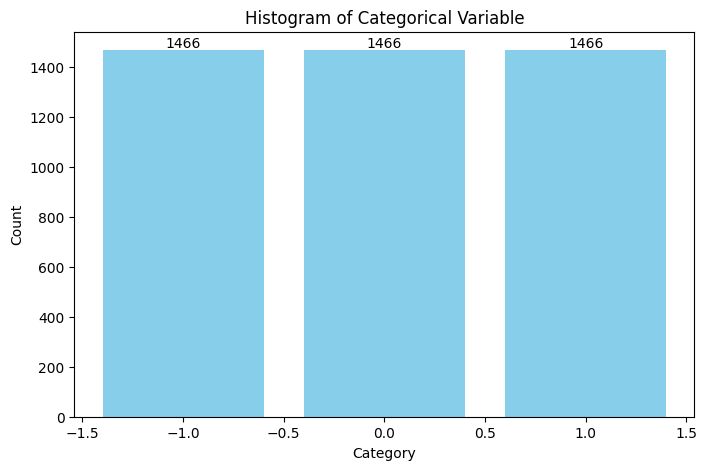

In [71]:


# 2. Undersample to balance classes
#    Let's assume your classes are in the column 'numeric_label'
class_counts = df['numeric_label'].value_counts()
min_count = class_counts.min()

# For each class, sample 'min_count' rows
balanced_dfs = []
for sentiment_value in class_counts.index:
    class_df = df[df['numeric_label'] == sentiment_value]
    class_df_undersampled = class_df.sample(n=min_count, random_state=42)
    balanced_dfs.append(class_df_undersampled)

# Combine them into a balanced DataFrame
df_undersampled = pd.concat(balanced_dfs).sample(frac=1, random_state=42).reset_index(drop=True)


category_counts = df_undersampled['numeric_label'].value_counts()

# Plot histogram
plt.figure(figsize=(8,5))
bars = plt.bar(category_counts.index, category_counts.values, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Categorical Variable')

# Add numeric labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{int(height)}', 
             ha='center', va='bottom', fontsize=10)

plt.show()



In [ ]:


df_undersampled.to_csv("../../UnderSampledUncombined/sentiment_data_yfinance.csv", index=False)
df.to_csv("../../FullSet/FullSetUncombined/nvda_sentence_sentiment_dataset_yfinance_cleaned.csv", index=False)
print("Files saved:\n- ../../FullSet/FullSetUncombined/nvda_sentence_sentiment_dataset_yfinance_cleaned.csv (full dataset)\n- ../../UnderSampledUncombined/sentiment_data_yfinance.csv (undersampled, balanced dataset)")


Files saved:
- ../FullSet/FullSetUncombined/nvda_sentence_sentiment_dataset_yfinance_cleaned.csv (full dataset)
- ../UnderSampledUncombined/sentiment_data_yfinance.csv (undersampled, balanced dataset)


# **Future Work:**
---
I will come back to the cleaned dataset and manually classify sentiment with a friend of mine in finance. We will then use this dataset to train sentiment instead of pre-trained Fin-BERT sentiments. This will take a while, and as we expand to more financial information, we will need to look into alternative methods.

### Current Help Needed:
---
If you can Work on 
 - data augmentation via synonym translation, back translating, and/or creating textual embeddings with the -1 and +1 samples of this dataset
 - Using SMOTE to create new data for -1 samples and +1 samples

That will be greatly appreciated.
